In [14]:
import json
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import re

In [4]:
df = pd.read_csv('../data/dataProcessing_files/df_modified_ver1.csv')
df.drop(columns={'Unnamed: 0'}, inplace=True)

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Premise Description,Address,Cross Street,Location
0,200908529,04/16/2020,04/16/2020,1740,9,Van Nuys,STREET,RIVERSIDE,FULTON,"(34.157936, -118.448372)"
1,201008046,04/14/2020,04/14/2020,1450,10,West Valley,STREET,VENTURA BL,LA MAIDA ST,"(34.1586274, -118.4312574)"
2,201008099,04/16/2020,04/16/2020,1250,10,West Valley,STREET,VENTURA BL,DONNA AV,"(34.2079816, -118.5483412)"
3,200908540,04/16/2020,04/16/2020,1515,9,Van Nuys,STREET,VAN NUYS BL,HUSTON ST,"(34.1594324, -118.420345)"
4,201007987,04/11/2020,04/11/2020,2330,10,West Valley,STREET,RESEDA BL,VICTORY BL,"(34.2120269, -118.5360834)"
...,...,...,...,...,...,...,...,...,...,...
570367,222005125,01/29/2022,01/28/2022,2245,20,Olympic,STREET,3RD ST,HOBART BL,"(34.069, -118.3054)"
570368,221504553,01/15/2022,01/14/2022,1553,15,N Hollywood,STREET,VINELAND AV,RIVERSIDE DR,"(34.1524, -118.3703)"
570369,221504766,01/20/2022,01/20/2022,1720,15,N Hollywood,STREET,BURBANK BL,TROOST AV,"(34.1722, -118.3866)"
570370,221505127,01/28/2022,01/28/2022,1430,15,N Hollywood,STREET,MAGNOLIA BL,HOLLYWOOD FY,"(34.1649, -118.3825)"


In [8]:
df = df.sort_values(by='DR Number').reset_index().drop(columns={'index'})
df

,DR Number,Date Reported,Date Occurred,Time Occurred,Area ID,Area Name,Premise Description,Address,Cross Street,Location
0,100100007,01/12/2011,11/08/2010,2200,1,Central,STREET,PICO,HOPE,"(34.0395, -118.2656)"
1,100100767,03/31/2010,03/31/2010,400,1,Central,STREET,1300 N BROADWAY,NaN,"(34.0695, -118.2324)"
2,100100831,04/18/2010,04/18/2010,140,1,Central,STREET,PICO,CHERRY,"(34.0424, -118.2718)"
3,100101004,06/05/2010,06/05/2010,2050,1,Central,STREET,FIGUEROA,WASHINGTON BL,"(34.0344, -118.2714)"
4,100101322,08/07/2010,08/07/2010,1615,1,Central,STREET,COLLEGE,ALAMEDA,"(34.0637, -118.2361)"
...,...,...,...,...,...,...,...,...,...,...
570367,222104843,01/26/2022,01/26/2022,1905,21,Topanga,STREET,WINNETKA AV,VICTORY BL,"(34.1857, -118.571)"
570368,222104874,01/27/2022,01/24/2022,1523,21,Topanga,STREET,TOPANGA CANYON BL,VANOWEN ST,"(34.1938, -118.6059)"
570369,222104886,01/27/2022,01/24/2022,1715,21,Topanga,STREET,DE SOTO AV,VENTURA FY,"(34.174, -118.5888)"
570370,222104962,01/29/2022,01/28/2022,1910,21,Topanga,STREET,AVENUE SAN LUIS,DUNMAN AV,"(34.1624, -118.6285)"


In [9]:
df_1 = pd.read_csv('../data/dataProcessing_files/df_modified_ver3.csv')
df_1.drop(columns={'Unnamed: 0'}, inplace=True)
df_1

,Area ID,Premise Description,Location,month,day,year,hour,Day Category,Area Name
0,1,STREET,"(34.0395, -118.2656)",11,8,2010,22,night,Central
1,1,STREET,"(34.0695, -118.2324)",3,31,2010,4,early_morning,Central
2,1,STREET,"(34.0424, -118.2718)",4,18,2010,1,early_morning,Central
3,1,STREET,"(34.0344, -118.2714)",6,5,2010,20,night,Central
4,1,STREET,"(34.0637, -118.2361)",8,7,2010,16,evening,Central
...,...,...,...,...,...,...,...,...,...
570367,21,STREET,"(34.1857, -118.571)",1,26,2022,19,night,Topanga
570368,21,STREET,"(34.1938, -118.6059)",1,24,2022,15,afternoon,Topanga
570369,21,STREET,"(34.174, -118.5888)",1,24,2022,17,evening,Topanga
570370,21,STREET,"(34.1624, -118.6285)",1,28,2022,19,night,Topanga


In [13]:
df_2 = pd.concat([df[['DR Number', 'Area ID', 'Area Name', 'Premise Description', 'Address', 'Cross Street']], df_1[['month', 'day', 'year', 'hour', 'Day Category', 'Location']]], axis=1)
df_2

,DR Number,Area ID,Area Name,Premise Description,Address,Cross Street,month,day,year,hour,Day Category,Location
0,100100007,1,Central,STREET,PICO,HOPE,11,8,2010,22,night,"(34.0395, -118.2656)"
1,100100767,1,Central,STREET,1300 N BROADWAY,NaN,3,31,2010,4,early_morning,"(34.0695, -118.2324)"
2,100100831,1,Central,STREET,PICO,CHERRY,4,18,2010,1,early_morning,"(34.0424, -118.2718)"
3,100101004,1,Central,STREET,FIGUEROA,WASHINGTON BL,6,5,2010,20,night,"(34.0344, -118.2714)"
4,100101322,1,Central,STREET,COLLEGE,ALAMEDA,8,7,2010,16,evening,"(34.0637, -118.2361)"
...,...,...,...,...,...,...,...,...,...,...,...,...
570367,222104843,21,Topanga,STREET,WINNETKA AV,VICTORY BL,1,26,2022,19,night,"(34.1857, -118.571)"
570368,222104874,21,Topanga,STREET,TOPANGA CANYON BL,VANOWEN ST,1,24,2022,15,afternoon,"(34.1938, -118.6059)"
570369,222104886,21,Topanga,STREET,DE SOTO AV,VENTURA FY,1,24,2022,17,evening,"(34.174, -118.5888)"
570370,222104962,21,Topanga,STREET,AVENUE SAN LUIS,DUNMAN AV,1,28,2022,19,night,"(34.1624, -118.6285)"


In [31]:
def process_coordinates(x):

    processed = x.replace('(', '').replace(')', '').replace(' ', '').split(',')

    # latitude, longitude
    return float(processed[0]), float(processed[1])

df_2['Latitude'] = df_2['Location'].apply(lambda x: process_coordinates(x)[0])
df_2['Longitude'] = df_2['Location'].apply(lambda x: process_coordinates(x)[1])
df_2.drop(columns={'Location'}, inplace=True)
df_2

,DR Number,Area ID,Area Name,Premise Description,Address,Cross Street,month,day,year,hour,Day Category,Latitude,Longitude
0,100100007,1,Central,STREET,PICO,HOPE,11,8,2010,22,night,34.0395,-118.2656
1,100100767,1,Central,STREET,1300 N BROADWAY,NaN,3,31,2010,4,early_morning,34.0695,-118.2324
2,100100831,1,Central,STREET,PICO,CHERRY,4,18,2010,1,early_morning,34.0424,-118.2718
3,100101004,1,Central,STREET,FIGUEROA,WASHINGTON BL,6,5,2010,20,night,34.0344,-118.2714
4,100101322,1,Central,STREET,COLLEGE,ALAMEDA,8,7,2010,16,evening,34.0637,-118.2361
...,...,...,...,...,...,...,...,...,...,...,...,...,...
570367,222104843,21,Topanga,STREET,WINNETKA AV,VICTORY BL,1,26,2022,19,night,34.1857,-118.5710
570368,222104874,21,Topanga,STREET,TOPANGA CANYON BL,VANOWEN ST,1,24,2022,15,afternoon,34.1938,-118.6059
570369,222104886,21,Topanga,STREET,DE SOTO AV,VENTURA FY,1,24,2022,17,evening,34.1740,-118.5888
570370,222104962,21,Topanga,STREET,AVENUE SAN LUIS,DUNMAN AV,1,28,2022,19,night,34.1624,-118.6285


In [32]:
df_2.to_csv(r'../data/dataProcessing_files/df_modified_ver4.csv')

In [2]:
df = pd.read_json('../data/traffic_data.json', orient='index', convert_axes=False)

df.drop('day_category', axis=1, inplace=True)
df.head()

,Area ID,Premise Description,Location,month,day,year,hour
100100007,1,STREET,"(34.0395, -118.2656)",11,8,2010,22
100100767,1,STREET,"(34.0695, -118.2324)",3,31,2010,4
100100831,1,STREET,"(34.0424, -118.2718)",4,18,2010,1
100101004,1,STREET,"(34.0344, -118.2714)",6,5,2010,20
100101322,1,STREET,"(34.0637, -118.2361)",8,7,2010,16


In [3]:
def day_category(num):
    if 6 <= num < 12:
        return 'morning'
    elif 12 <= num < 16:
        return 'afternoon'
    elif 16 <= num < 19:
        return 'evening'
    elif 19 <= num <= 23:
        return 'night'
    elif 1 <= num < 6:
        return 'early_morning'


df['Day Category'] =  df['hour'].apply(lambda x: day_category(x))

In [4]:
area_name = {
    1: 'Central',
    2: 'Rampart',
    3: 'Southwest',
    4: 'Hollenbeck',
    5: 'Harbor',
    6: 'Hollywood',
    7: 'Wilshire',
    8: 'West LA',
    9: 'Van Nuys',
    10: 'West Valley',
    11: 'Northeast',
    12: '77th Street',
    13: 'Newton',
    14: 'Pacific',
    15: 'N Hollywood',
    16: 'Foothill',
    17: 'Devonshire',
    18: 'Southeast',
    19: 'Mission',
    20: 'Olympic',
    21: 'Topanga'
}

df['Area Name'] = df['Area ID'].apply(lambda x: area_name[x])

In [15]:
df.shape

(570372, 9)

In [17]:
df['Day Category'].value_counts()

morning          138416
afternoon        133415
night            122527
evening          111778
early_morning     64236
Name: Day Category, dtype: int64

In [18]:
df['Area Name'].value_counts()

77th Street    37914
Southwest      33602
Wilshire       32140
N Hollywood    30026
West LA        29948
Olympic        29854
Pacific        29650
Newton         29220
Van Nuys       28382
Devonshire     27890
West Valley    27572
Hollywood      27517
Northeast      25502
Mission        24972
Southeast      24708
Topanga        24248
Central        23407
Rampart        21508
Harbor         21471
Hollenbeck     20719
Foothill       20122
Name: Area Name, dtype: int64

Text(0.5, 1.0, 'Traffic Collision by Day Category')

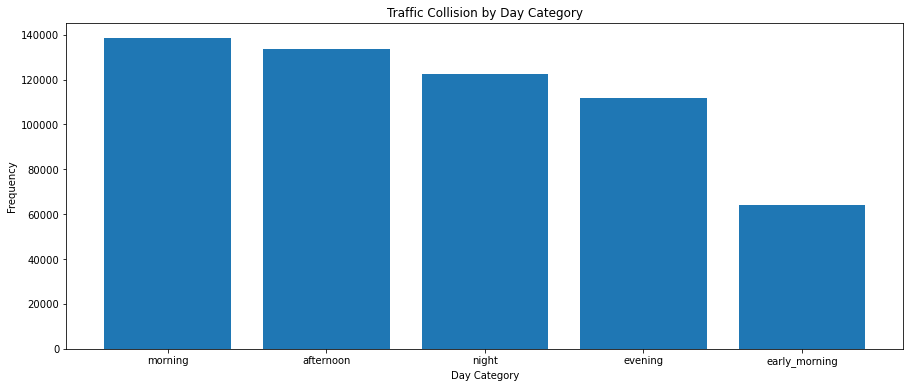

In [20]:
plt.figure(figsize=(15,6))
plt.bar(df['Day Category'].value_counts().index, df['Day Category'].value_counts())
plt.xlabel('Day Category')
plt.ylabel('Frequency')
plt.title('Traffic Collision by Day Category')

- Morning: 6am - 11:59am (6-11)
- Afternoon: 12pm - 3:59pm (12-3)
- Evening: 4pm - 6:59pm (4-6)
- Night: 7pm-11:59pm (7-11)
- Early Morning: 1am - 6am

- Traffic Accidents seem to occur during morning/afternoon hours more than others...

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Traffic Collision by Hour')

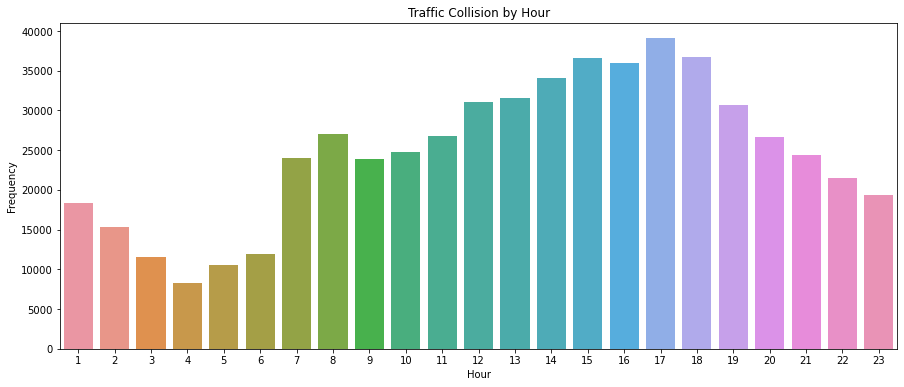

In [21]:
plt.figure(figsize=(15,6))
sns.barplot(df['hour'].value_counts().index, df['hour'].value_counts())
plt.xlabel('Hour')
plt.ylabel('Frequency')
plt.title('Traffic Collision by Hour')

- Traffic Collisions seems to be at the peak levels during evening time, steadily increasing from morning 9 am until 6 pm in the evening until it drops.

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Traffic Collision by Day')

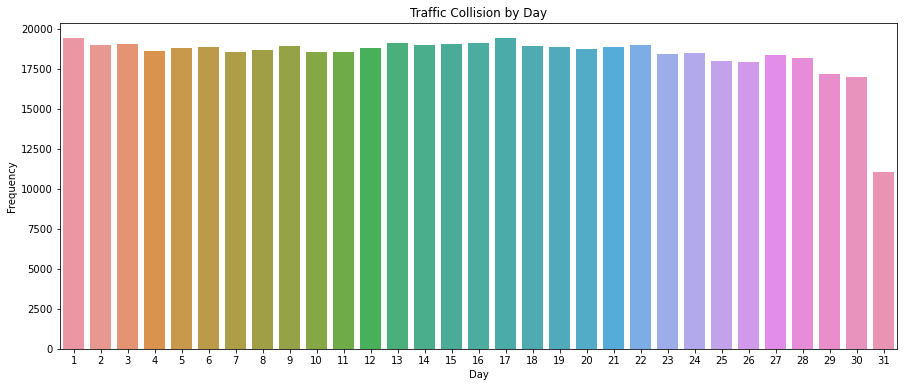

In [22]:
plt.figure(figsize=(15,6))
sns.barplot(df['day'].value_counts().index, df['day'].value_counts())
plt.xlabel('Day')
plt.ylabel('Frequency')
plt.title('Traffic Collision by Day')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Traffic Collision by Month')

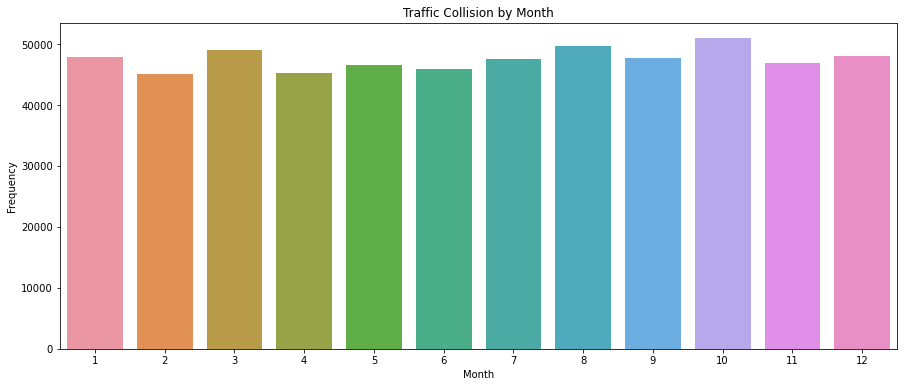

In [23]:
plt.figure(figsize=(15,6))
sns.barplot(df['month'].value_counts().index, df['month'].value_counts())
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Traffic Collision by Month')

/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Top 10 spots for traffic accidents')

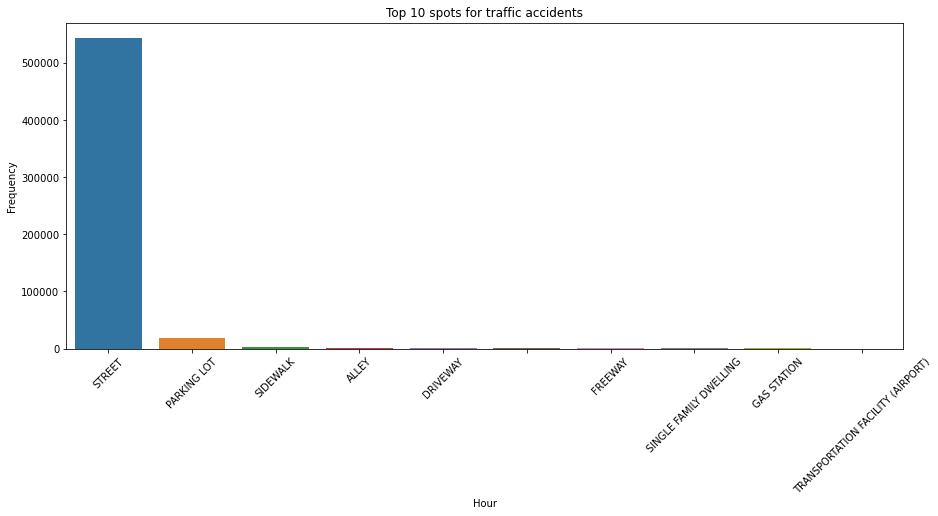

In [24]:
plt.figure(figsize=(15,6))
sns.barplot(df['Premise Description'].value_counts().index[:10], df['Premise Description'].value_counts()[:10])
plt.xlabel('Hour')
plt.xticks(rotation=45)
plt.ylabel('Frequency')
plt.title('Top 10 spots for traffic accidents')

In [8]:
pd.DataFrame(df['Premise Description'].value_counts() / df['Premise Description'].value_counts().sum())

,Premise Description
STREET,0.952466
PARKING LOT,0.031593
SIDEWALK,0.005358
ALLEY,0.001780
DRIVEWAY,0.001716
...,...
REDLINE SUBWAY PLATFORM,0.000002
PRIVATE SCHOOL/PRESCHOOL,0.000002
"OTHER RR TRAIN (UNION PAC, SANTE FE ETC",0.000002
PAWN SHOP,0.000002


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Traffic Collision by Area')

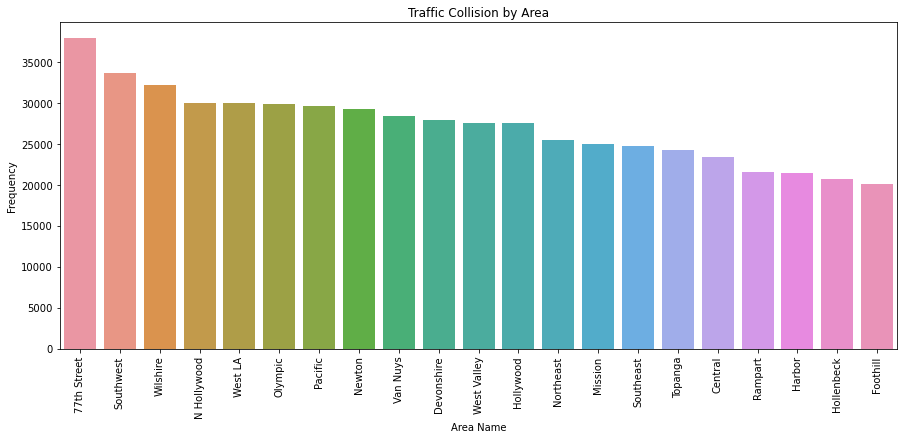

In [41]:
plt.figure(figsize=(15,6))
sns.barplot(df['area name'].value_counts(ascending=False).index, df['area name'].value_counts(ascending=False))
plt.xlabel('Area Name')
plt.xticks(rotation=90)
plt.ylabel('Frequency')
plt.title('Traffic Collision by Area')

In [9]:
df.head()

,Area ID,Premise Description,Location,month,day,year,hour,Day Category,Area Name
100100007,1,STREET,"(34.0395, -118.2656)",11,8,2010,22,night,Central
100100767,1,STREET,"(34.0695, -118.2324)",3,31,2010,4,early_morning,Central
100100831,1,STREET,"(34.0424, -118.2718)",4,18,2010,1,early_morning,Central
100101004,1,STREET,"(34.0344, -118.2714)",6,5,2010,20,night,Central
100101322,1,STREET,"(34.0637, -118.2361)",8,7,2010,16,evening,Central


In [13]:
df.to_csv(r'../data/df_modified_ver3.csv')

In [16]:
# Function to convert CSV file to JSON
def make_json(csvFilePath, jsonFilePath):

    #1. Import data into pandas
    accident_data = pd.read_csv(csvFilePath)
    accident_data.rename(columns={'Unnamed: 0': 'DR Number'}, inplace=True)
    accident_data = accident_data.fillna('')
    #3. Sort by customer id
    accident_data.sort_values(by=['DR Number'], inplace=True)
    cols = list(accident_data.columns)
    cols.remove('DR Number')

    #4. Convert CSV file to JSON by making dictionary first and then writing to json file

    data = {}

    for index, row in accident_data.iterrows():
        key = row['DR Number']
        acc_details = row[cols].to_dict()
        data[key] = acc_details

    #5. Dumping JSON file into the local system
    with open(jsonFilePath, 'w', encoding='utf-8') as jsonf:
        jsonf.write(json.dumps(data, indent=4))


# 6. Running the function to make JSON file...
data = make_json(r'../data/df_modified_ver3.csv', r'../data/traffic_data_1.json')

In [4]:
accident_data = pd.read_csv(r'../data/df_modified_ver3.csv')
accident_data.rename(columns={'Unnamed: 0': 'DR Number'}, inplace=True)
accident_data = accident_data.fillna('')
#3. Sort by customer id
accident_data.sort_values(by=['DR Number'], inplace=True)
accident_data

,DR Number,Area ID,Premise Description,Location,month,day,year,hour,Day Category,Area Name
0,100100007,1,STREET,"(34.0395, -118.2656)",11,8,2010,22,night,Central
1,100100767,1,STREET,"(34.0695, -118.2324)",3,31,2010,4,early_morning,Central
2,100100831,1,STREET,"(34.0424, -118.2718)",4,18,2010,1,early_morning,Central
3,100101004,1,STREET,"(34.0344, -118.2714)",6,5,2010,20,night,Central
4,100101322,1,STREET,"(34.0637, -118.2361)",8,7,2010,16,evening,Central
...,...,...,...,...,...,...,...,...,...,...
570367,222104843,21,STREET,"(34.1857, -118.571)",1,26,2022,19,night,Topanga
570368,222104874,21,STREET,"(34.1938, -118.6059)",1,24,2022,15,afternoon,Topanga
570369,222104886,21,STREET,"(34.174, -118.5888)",1,24,2022,17,evening,Topanga
570370,222104962,21,STREET,"(34.1624, -118.6285)",1,28,2022,19,night,Topanga


In [7]:
accident_data['month'].mode()

0    10
dtype: int64

In [9]:
pd.DataFrame(accident_data['Premise Description'].value_counts())

,Premise Description
STREET,543260
PARKING LOT,18020
SIDEWALK,3056
ALLEY,1015
DRIVEWAY,979
...,...
REDLINE SUBWAY PLATFORM,1
PRIVATE SCHOOL/PRESCHOOL,1
"OTHER RR TRAIN (UNION PAC, SANTE FE ETC",1
PAWN SHOP,1
